#Matplotlib Khaliq Aghakarimov

on the same subject, another very complete tutorial: http://jeffskinnerbox.me/notebooks/matplotlib-2d-and-3d-plotting-in-ipython.html

In [0]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)


"""
We will use the default style.
The following command is not necessary if you are working on jupyter notebook.
"""
plt.style.use('default')


"Note: colab uses the 'seaborn' style which is quite nice. ";
#plt.style.use('seaborn')

## Intro Khaliq Aghakarimov

Matplotlib is a very rich library but also quite messy. Without the help of the internet, it is difficult to find the right commands, and when you surf you get the impression that there are lots of different syntaxes to do the same thing. So much for the bad news. The good news is that `matplotlib` makes great graphics. 

This chapter attempts as much as possible complete presentation (and therefore somewhat boring) and explains the link between the two main syntaxes: explicit and implicit. Read this chapter quickly to see how much can be done. Review it when necessary.

## Figure and graphics boxes Khaliq Aghakarimov

We start with layout considerations. This is not the most exciting thing, but without it we don't understand what happens next. 

### one figure, several graphics boxes

The initialization of a graph is done in two steps:

* first we define the figure, which is traditionally called `fig` and which represents the window.
* then in the figure we define one or more graphic boxes, which we traditionally call `ax` (for `axes').    

Let's do this in two different ways

In [0]:
""" Data to be plotted """
x=np.linspace(0,20,100)
y=np.cos(x)
y_prime=np.sin(x)

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


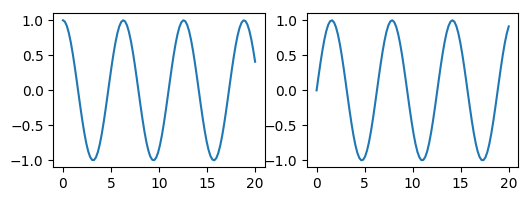

In [0]:
""" First method, with 'fig.add_subplot()' """
fig=plt.figure(figsize=(6,2))
ax0=fig.add_subplot(1,2,1) # in a grid of 1 ligne, 2 columns, we add the first graphic box 
ax0.plot(x,y)
ax1=fig.add_subplot(1,2,2) # in a grid of 1 ligne, 2 columns, we add the second graphic box 
ax1.plot(x,y_prime);
"let's look at the type of objects we've created"
print(type(fig))
print(type(ax0))

***Attention:***** `fig.add_subplot(n,m,i)` creates the i-th graphic box in a grid $n\times m$ but the numbering of the boxes starts at 1!!!! 

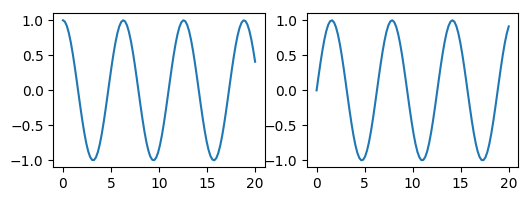

In [0]:
""" Second method with 'plt.subplots(1,2)' """
fig,axs=plt.subplots(1,2,figsize=(6,2)) # we create the figure and the 2 graphs-boxes
axs[0].plot(x,y)
axs[1].plot(x,y_prime);

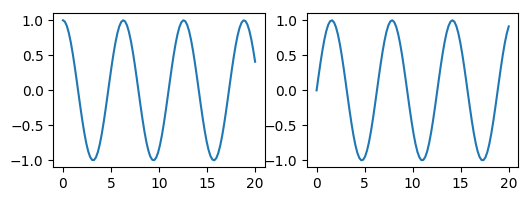

In [0]:
""" Second method, variant """
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(6,2))
ax0.plot(x,y)
ax1.plot(x,y_prime);

***Attention-suite:*** `plt.subplots(n,m)` creates a grid of $n\times m$ graphic boxes. It returns a numpy tensor, so the numbering starts at 0 this time. 

***TODO:*** There is a mathematical incongruity in the previous graphs. Did you seen it $(1\heartsuit)$?

### Several figures

In notebooks, figures stack up on top of each other. Putting several figures is therefore equivalent to making vertical subplots; except that you can change the color around, cool right! 

On the other hand, apart from matplotlib, each figure opens in a different window!

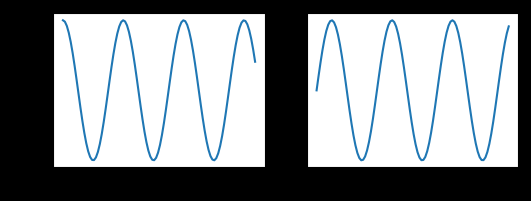

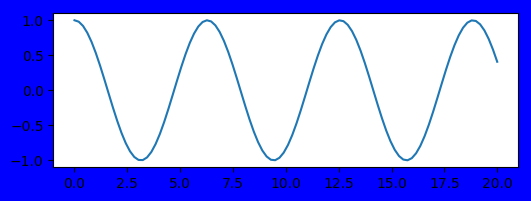

In [0]:
figA,(axA0,axA1)=plt.subplots(1,2,figsize=(6,2),facecolor='black')
axA0.plot(x,y)
axA1.plot(x,y_prime);

figB,axB=plt.subplots(1,1,figsize=(6,2),facecolor='blue')
axB.plot(x,y);

### A 3D graphics box

The second way is longer (especially if you want 16 graphics boxes) but it allows you to make 3D graphics boxes with: `ax=fig.add_subplot(1,2,1, projection='3d')` 

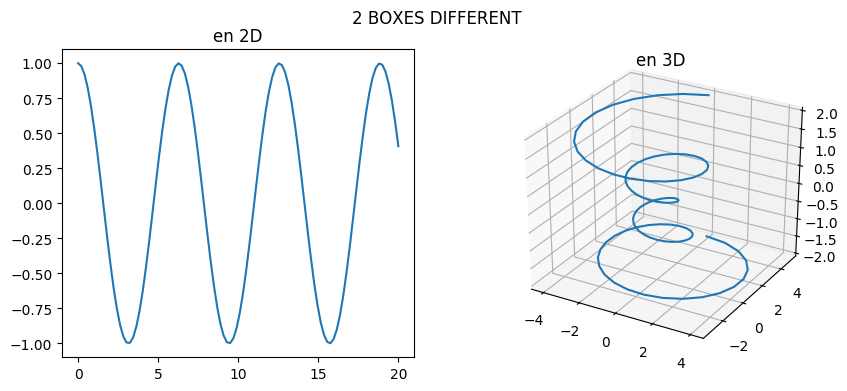

In [0]:
""" first method with on of 2 boxes in 3d"""
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,4))
fig.suptitle("2 BOXES DIFFERENT")

ax0=fig.add_subplot(1,2,1) 
ax0.set_title("en 2D")
ax0.plot(x,y)

#----------------------------------
z3 = np.linspace(-2, 2, 100)
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
r3 = z3**2 + 1
x3 = r3 * np.sin(theta)
y3 = r3 * np.cos(theta)
ax1=fig.add_subplot(1,2,2, projection='3d') #  the second graphic-box in 3d
ax1.set_title("en 3D")
ax1.plot(x3,y3,z3);

### Graphic boxes sharing graduations

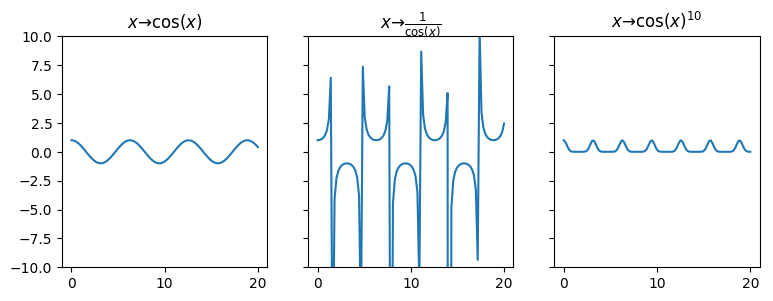

In [0]:
"A vector of three graphics boxes"

fig,axs=plt.subplots(1,3,sharey=True,figsize=(9,3))
#variante: fig,(ax0,ax1,ax2)=plt.subplots(1,3)

"Attention axis[0,0] causes an error because a vector has been created"
axs[0].plot(x,y)
axs[0].set_title(r"$x \to \cos(x)$")

axs[1].plot(x,1/y)
axs[1].set_title(r"$x \to \frac {1}{\cos(x)}$")
axs[1].set_ylim([-10,10])

axs[2].plot(x,y**10)
axs[2].set_title(r"$x \to \cos(x)^{10}$");

***TODO:*** 

* Vertical asymptotes (=pic) do not all have the same height. Weird, correct ($1\heartsuit$)! 
* By replacing `y=np.cos(x)` with `y=np.sin(x)` it bug, explain ($2\heartsuit$) why?
* Put ($2\heartsuit$) these three graphs in column, and make sure they share the same graduations on the abscissa. 

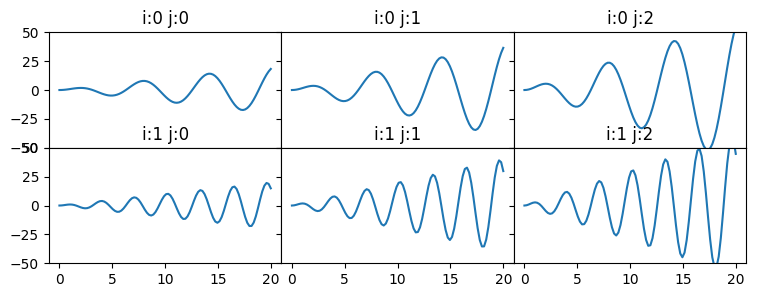

In [0]:
"A matrice of $2\times 3$ graphic-boxes"
fig,ax=plt.subplots(2,3,sharex=True,sharey=True,figsize=(9,3))
#variante: fig,((ax0,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(1,3)

"we delete the margins that are set by default. We could also increase them"
fig.subplots_adjust(wspace=0.,hspace=0)

for i in range(2):
    for j in range(3):
        ax[i,j].plot(x,np.sin((i+1)*x)*(j+1)*x)
        ax[i,j].set_title("i:"+str(i)+" j:"+str(j))
        """We use the same scale to compare the graphs"""
        ax[i,j].set_ylim([-50,50])

### Graphic box spacing

To space the graphic boxes, you can use `fig.subplots_adjust(wspace=0.6,hspace=0.6)`.  But the really magical function 
it's `fig.tight_layout()` which manages the spacing by itself

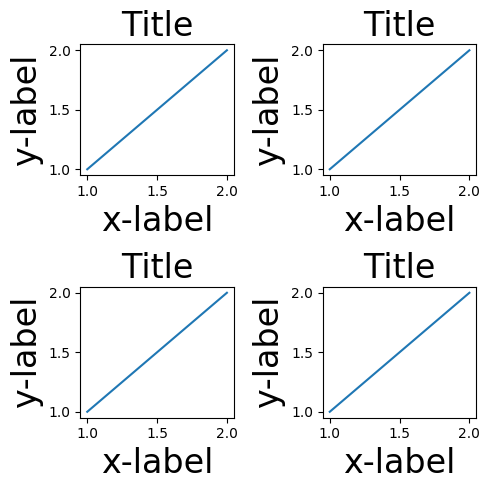

In [0]:
def example_plot(ax):
    fontsize=24
    ax.plot([1, 2],[1,2])
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(5,5))
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
fig.tight_layout()
"If you want a less tight layout"
#fig.tight_layout( w_pad=4, h_pad=2)
"the word 'pad' means 'padding' (=spacing)";

### Twisted interlocking

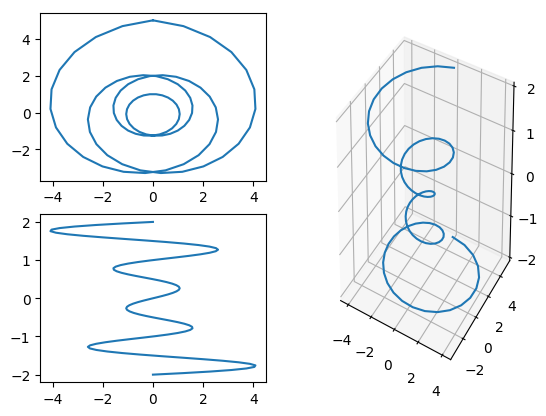

In [0]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(1,2,2, projection='3d')
ax1.plot(x3,y3)
ax2.plot(x3,z3)
ax3.plot(x3,y3,z3);

***TODO:*** Add $(1\heartsuit)$ the trace of `z3` according to `y3` on the same figure; lay it down a little.  

To make complicated interlocking, we can use `subplot2grid`. For example, here is how to display random draws with histograms of marginal laws.

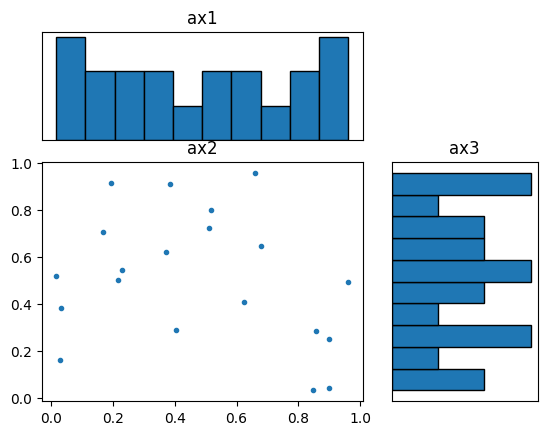

In [0]:
"in a grid 3*3"

"a box starting from (0,0), which occupies 2 columns (and 1 default line) "
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax1.set_title("ax1")

"a box starting from (1,0), which occupies 2 columns and 2 lines "
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2,rowspan=2)
ax2.set_title("ax2")

"a box starting from (1,2), which occupies  2 lines (and 1 default column) "
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax3.set_title("ax3")

data=np.random.random(size=[20,2])
ax2.plot(data[:,0],data[:,1],".")
ax1.hist(data[:,0],edgecolor="k")
ax3.hist(data[:,1],orientation='horizontal',edgecolor="k")

ax1.set_xticks([]) # ou bien ax1.axis("off")
ax1.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([]);

## The implicit syntax Khaliq Aghakarimov

The implicit syntax is slightly shorter, much used, but it is officially "discouraged" (however in official help they sometimes use one, sometimes the other). 

The word "implicit" comes from the fact that we do not explicitly name the figure `fig` and the graphic box `ax`. These objects are hidden, and sometimes this makes things less clear. 

In [0]:
"""The data"""
x=np.linspace(0,4*np.pi,100)
y=np.sin(x)

### a shorter syntax

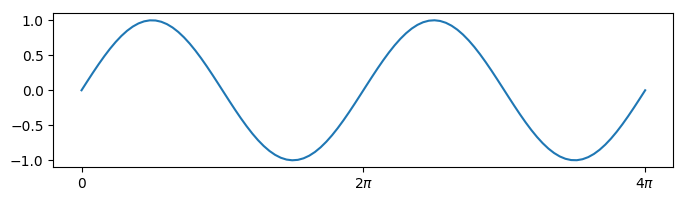

In [0]:
plt.figure(figsize=(8,2))
plt.plot(x,y)
plt.xticks([0,2*np.pi,4*np.pi],["0",r"$2\pi$",r"$4\pi$"]);

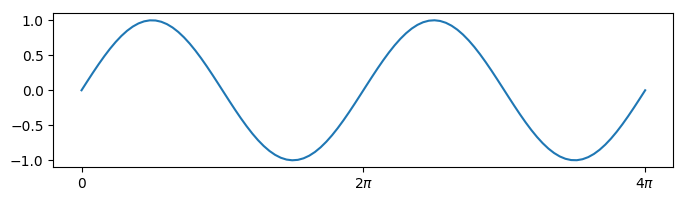

In [0]:
"instead of"
fig,ax=plt.subplots(figsize=(8,2))
ax.plot(x,y)
ax.set_xticks([0,2*np.pi,4*np.pi])
ax.set_xticklabels(["0",r"$2\pi$",r"$4\pi$"]);

### Several boxes

The implicit syntax also allows you to make several graphics boxes. But observe this: there is a notion of "common graphics box" in which we trace the `plt.plot()`

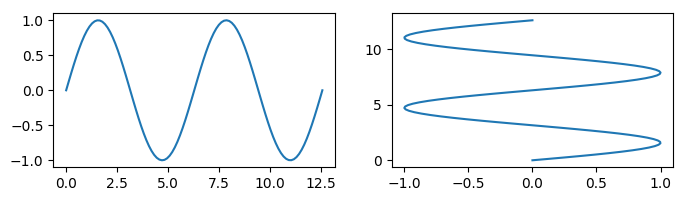

In [0]:
plt.figure(figsize=(8,2))
plt.subplot(1,2,1) 
plt.plot(x,y)
"""change of graphic-box"""
plt.subplot(1,2,2) 
plt.plot(y,x);

### Retrieve figure and graphics boxes $\flat$

This part is a little technical. Read it if you want to understand the link between implicit and explicit syntax. 

By default, a current figure is automatically created. Then when you write `plt.subplot(1,2,1)` a current graphics box is automatically created. You can retrieve the current figure with `plt.gcf()` and the current graphics box with `plt.gca()` or as the result of `plt.subplot(1,2,1)`. The proof:

ax1 is ax2: False
aa is ax1: True
fig1 is fig2: True


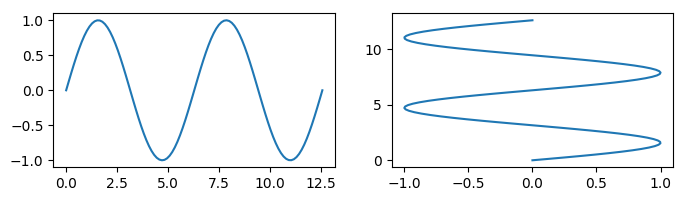

In [0]:
plt.figure(figsize=(8,2))
aa=plt.subplot(1,2,1)
plt.plot(x,y)

fig1=plt.gcf() #-> figure
ax1=plt.gca()  #-> boite (=axes)

plt.subplot(1,2,2)
plt.plot(y,x)

fig2=plt.gcf() #-> figure
ax2=plt.gca()  #-> boite (=axes)

print("ax1 is ax2:",ax1 is ax2)
print("aa is ax1:",aa is ax1)
print("fig1 is fig2:",fig1 is fig2)

#Using explicit syntax make things more explicit!"
#fig,(ax1,ax2)=plt.subplots(1,2)
#fig.set_size_inches(8,2)
#ax1.plot(x,np.sin(x))
#ax2.plot(np.sin(x),x);

### Beware of variations (Grrrr) $\sharp$

The implicit syntax allows you to directly change the options of the current graphics box. Example:

* `plt.legend()`: for labels to be displayed.
* `plt.ylim()`: limits the ordinates
* `plt.xticks()`: the graduations in `x`

Which is the equivalent of:

* `ax.legend()`  
* `ax.set_ylim()`
* `ax.set_xticks()` and `ax.set_xticklabels()`


These variations are relatively painful but you get used to them. 

## The curves Khaliq Aghakarimov

Enough about the form, let's talk about the content!  

### A complete example

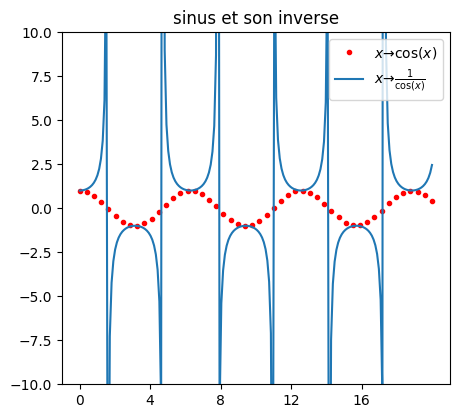

In [0]:
x=np.linspace(0,20,200)
x_=np.linspace(0,20,50)

fig,ax=plt.subplots(figsize=(5,5)) # One figure, one box. 

ax.plot(x_,np.cos(x_),"r.",label=r"$x \to \cos(x)$")
ax.plot(x,1/np.cos(x),label=r"$x \to \frac {1}{\cos(x)}$")
ax.set_aspect("equal") #same scale for abscissa and ordinate
ax.set_ylim([-10,10]) #limitation of the ordinates
ax.set_xticks(np.linspace(0,20,5,endpoint=False)) #graduations
ax.set_title("sinus et son inverse")
ax.legend(loc='upper right');# see comments below

For the legend, the possible locations are either strings or numbers: 
* 'best' 0
* 'upper right' 1
* 'upper left' 2
* 'lower left' 3
* 'lower right' 4
* 'right' 5
* 'center left' 6
* 'center right' 7
* 'lower center' 8
* 'upper center' 9
* 'center' 10

### 3D Curves

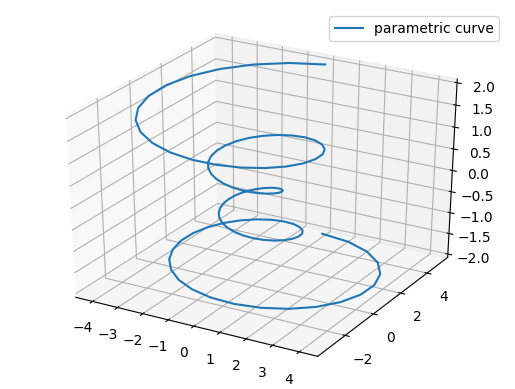

In [0]:
"this import is necessary even if the keyword 'Axes3D' does not appear afterwards.  "
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')

ax.legend();

### A changing color curve

This can be useful when you want to represent a parametric curve $x(t),y(t)$ by showing the time flow $t$.

(-1.1, 1.1)

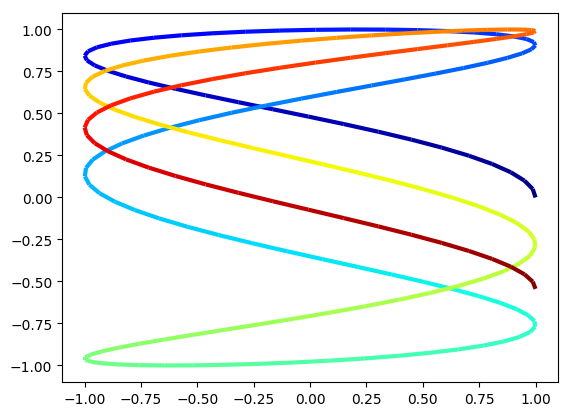

In [0]:
from matplotlib.collections import LineCollection

t = np.linspace(0, 10, 200) #time
x = np.cos(np.pi * t)
y = np.sin(t)
points = np.array([x, y]).T.reshape(-1, 1, 2)
"we create a collection of segments"
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap="jet",norm=plt.Normalize(0, 10))
"it is specified that the color must vary according to t"
lc.set_array(t)
lc.set_linewidth(3)

fig,ax=plt.subplots()
ax.add_collection(lc)
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)

***TODO:*** Create $(4\heartsuit)$ a 3D parametric curve of changing color. 

### summary of the main arguments of.plot()

1/ Mandatory arguments

* `x`: the list of abscissa 
* `y`: the list of ordinates

2/ The argument that defines the line style. That we always put in third position. But it is optional. 

* It may be a color. If not specified, the color changes with each call of `ax.plot()`
    * `"r"`: ***r***ed
    * `"k"`: blac***k***
    * `"b"`: ***b***lue
* This can be a symbol, e. g:     
    * `"."."" `: a small point for each `x`
    * ``"o"`: a big point for each `x`
    * ``"o-"`: big dots and a line
    * `:`: dotted line. The spacing of the dots does not depend on the spacing of the `x` (unlike the `".""" ` option)
* It may be a mixture, e. g:

    * ``r.'': small red dots
    * ``ko``: big black dots
    * ``go-``: guess what!
    

3/ Optional arguments

* `label=`: a string of characters associated with each curve. Don't forget to call `ax.legend()` to have the labels displayed
* `lw=2`: line thickness (=lineWidth)

## ticks, labels and text Khaliq Aghakarimov

### Latex

Latex can be used in all matplotlib texts, but beware of the syntax: `r"$...$"`. The `r` in front of the quotation marks means `raw, and this tells python not to interpret the special characters. 

### Complete Examples

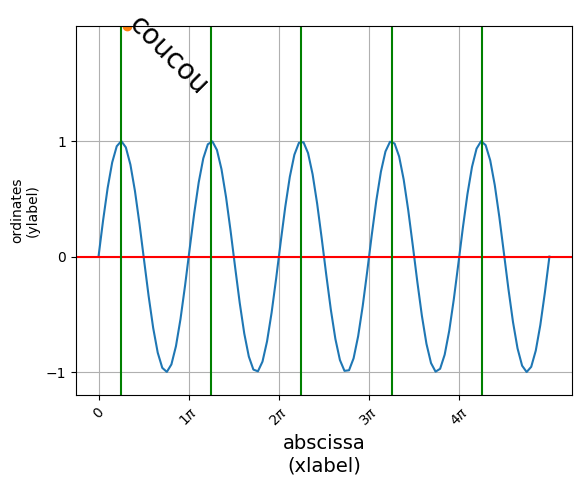

In [0]:
"data"
right=10*np.pi
x=np.linspace(0,right,100)
y=np.sin(x)
pis=np.arange(0,right,2*np.pi)
maxis=pis+np.pi/2

"plot"
fig,ax=plt.subplots()
ax.plot(x,y)
ax.grid(True)

"ticks"
xticks_text=["0"]
for i in range(1,len(pis)): xticks_text.append(str(i)+r"$\pi$")    
ax.set_xticks(pis)
ax.set_xticklabels(xticks_text,rotation=45)
ax.set_yticks([-1,0,1])
# en implicite: plt.xticks(maxis,xticks_text,rotation=45)

"label"
ax.set_xlabel("abscissa\n(xlabel)",fontsize=14)
ax.set_ylabel("ordinates\n(ylabel)")
ax.set_ylim(-1.2,2)
ax.axhline(0.,c="r")
for x in maxis: ax.axvline(x,c="g")

ax.plot(2,2,"o")  
ax.text(2, 2, "coucou", fontsize=20,rotation=-45,rotation_mode='anchor');

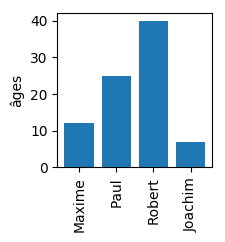

In [0]:
ages=[12,25,40,7]
names=["Maxime","Paul","Robert","Joachim"]
"plot"
fig,ax=plt.subplots()
fig.set_size_inches(2,2)
ax.bar([1,2,3,4],ages)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(names,rotation=90)
ax.set_ylabel("âges");

## Surface area Khaliq Aghakarimov

To observe the graph of a function of $\mathbb R^2$ in $\mathbb R$, we can make a 3d graph (see below). But, personally, I find that the color level plots are much lighter: color replaces the third dimension.

### Display a matrix

By default: the color scale ranges from dark blue to light yellow. 

***Tip:*** As soon as you have several graphics boxes, specify the color scale by hand. 

In [0]:
M=np.array([[-10,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15]])
print(M)

fig,ax=plt.subplots(1,2)
img0=ax[0].imshow(M,vmin=-20, vmax=30) # we precise the scale of colors
img1=ax[1].imshow(2*M.T,vmin=-20, vmax=30)


"""Attention, you have to pass the result of imshow() as a colorbar() argument. """
fig.colorbar(img0); #we could also put `img1`: this change nothing when we precise vmin and vmax

***Attention:*** If you don't see any small squares above, it's because you're using a different style than the `default` style I'm using.  Some environments use by default the `classic' style in which the `imshow` function smoothes the image, which can also be interesting. Let's compare the smoothings:

In [0]:
fig,axs=plt.subplots(1,4,figsize=(12,4))
axs[0].imshow(M,interpolation="nearest")
axs[1].imshow(M,interpolation="bilinear")
axs[2].imshow(M,interpolation="bicubic")
axs[3].imshow(M,interpolation="spline16");

In [0]:
""" a variant that never smoothes, and that puts the indices logically for matrices  """
fig,ax=plt.subplots()
img=ax.matshow(M)
fig.colorbar(img); #we didn't precise vmin and vmax, so it will be min and max of the matrix

### Display the graph of a function

Now we'll see how to create the graph of a function from $\mathbb R^2$ in $\mathbb R$. First, we create two matrices where we repeat the abscissa and ordinate. 

In [0]:
x=np.linspace(0,2,11)
y=np.linspace(1,2,11)

XX,YY=np.meshgrid(x,y)

print("XX\n",XX)
print("YY\n",YY)

fig,ax=plt.subplots(1,2)
ax[0].imshow(XX);
ax[1].imshow(YY);

Then, we use our tables of abscissa and ordinates `XX` and `YYY` as if it were the variables of the function $F(x,y)$ that we want to plot. Observe and then analyze why it works. In the code below, we also use interesting options from `plt.imshow()`:

* `origin='lower'': to put the origin down as we like in math. Be careful, by default `origin='upper'': because this is the classic convention of screens.
* `extent=[x_min,x_max,y_min,y_min,y_max]`: allows you to specify the scale
* `cmap='jet' `: 
    * `=coolwarm`: the color scale being a "heat" scale
    * `=jet`: (my favorite); also a'heat' scale, more artificial, but with more contrasts. 
    * `=grey`: in grayscale 
* `vmin=..., vmax=...`: the color scale. By default `vmin=max(data)`, `vmax=min(data)`
* `interpolation=...` 
    * `=nearest`: Each cell of the matrix is represented by a square. This is the default option except in some versions: -(
    * `='bilinear'': the image is smoothed. 

In [0]:
x_min,x_max,y_min,y_max=-4,4,-4,4

x = np.linspace(x_min, x_max, 50)
y = np.linspace(y_min, y_max, 50)
XX,YY= np.meshgrid(x,y)

F=np.exp(-0.5*(XX**2+YY**2))

"""Attention, by default origin='upper': the origin is in the upper left corner"""
fig,(ax,ax1)=plt.subplots(1,2)
img=ax.imshow(F,origin='lower',extent=[x_min,x_max,y_min,y_max],cmap='jet',interpolation='bilinear')
"a slightly less beautiful, but more practical variant (origin at the bottom, and no need to calculate an extent)"
ax1.pcolormesh(XX,YY,F,cmap="jet",shading='gouraud')
ax1.set_aspect("equal")

***Note:*** The `pcolormesh` variant has two advantages: You don't need to specify `origin='lower'` and `extent` is done naturally from `XX` and `YY`. The disadvantage is that the smoothing has a strange name and is not very pretty. 


***TODO:*** Increase or decrease the resolution of the image (=the number of points in `np.linspace()`). Why does it almost not change the look? What $(1\heartsuit)$ option of `imshow()` must be changed for the resolution differences to appear?

### Contour

In [0]:
fig,(ax0,ax1)=plt.subplots(1,2)
"attention, the contour function requires XX and YY"

"let's superpose the density (a little transparent) with contours"
ax0.imshow(F,origin='lower',extent=[x_min,x_max,y_min,y_max],cmap='jet',interpolation='bilinear',alpha=0.8)
ax0.contour(XX,YY,F,origin='lower',cmap='jet')
ax0.set_aspect("equal")

"few gaussian parts"
ax1.contourf(XX,YY,F,origin='lower',cmap='jet',levels=np.linspace(0,1,6))
ax1.set_aspect("equal");


***TODO:*** Trace $(3*2\heartsuit)$ the graph of the functions

* $(x,y)\to \|\|(x,y)\|_2$ (the Euclidean norm)    
* $(x,y)\to \|\|(x,y)\|_\infty$ (the infinite norm)    
* $(x,y)\to \|\|(x,y)\|_1$ (standard 1)  

The domain will be chosen so that the unit balls associated with each of these standards can be observed. 

In [0]:
"""Help: You will need to extract as much as possible. There are two possibilities for this:
Maximum term to term between two lists"""
print(np.maximum([1,2],[0,3]))
"""Maximum of a list"""
print(np.max([1,2,3,4])) 

### 3D surface

To visualize well in 3d, it is necessary to be able to rotate the figures. Unfortunately the interactive view is not yet available in notebooks without complicated handling (But this will probably come very quickly). 

In [0]:
""" this import is important even if you don't see any part of it appear 'Axes3D' """
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')
ax2 = fig.add_subplot(1,2,2, projection='3d')

"""Data"""
X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

""" Warning with antialiased=True (default option), 
it can produce a visual artifact. But it also depends on the style"""
surf = ax.plot_surface(X, Y, Z, antialiased=False)
ax.set_zlim(-1.01, 1.01)
"to change the angle of the view (perspective)"
ax.view_init(30, 60);

"interesting for drawing planes or surfaces close to a plane: you can see the inclination"
ax2.plot_wireframe(X, Y, X+Y, rstride=3, cstride=3);

### Colors and 3D

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
surf = ax.plot_surface(X, Y, Z, antialiased=False,cmap="coolwarm")
fig.colorbar(surf);

## Scatter Khaliq Aghakarimov


A scatter-plot is a graph with unrelated points. Points can be represented by circles, crosses, triangles etc. Note that the `.plot(x,y, "o")` method already performs a scatter-plot. However, the `.scatter()` method allows more flexibility, in particular the ability to vary the rays and colors of the points. 

### Simple example

In [0]:
import sklearn.datasets
X, y = sklearn.datasets.make_moons(n_samples=5000, noise=0.30, random_state=42)

fig,(ax0,ax1)=plt.subplots(1,2,figsize=(10,5),sharey=True)

ax0.scatter(
      X[:500,0],#abscissa
      X[:500,1],#ordinates
      c=y[:500],#coulor
      edgecolor="w", #coulor of tour
      cmap="jet" #color-map
  )
ax0.set_title("a lot of data")
ax0.set_aspect("equal")

ax1.scatter(
      X[:,0],
      X[:,1],
      c=y[:],
      marker=".", #small dots
      alpha=0.3,
      linewidths=0, #pas d'entourage
      cmap="jet"
  )
ax1.set_title("more big data")
ax1.set_aspect("equal")

***TODO:*** Describe $(2\diamondsuit)$ the tricks used to manage the superposition of points.

### Overlaying a scatterer and an image

Let's do a difficult exercise right now. We want to:

* an image representing a function in color level
* on which a scatter is superimposed (=points distributed on the plane)
* we want to associate to each point a numerical value
* that these points are colored according to their numerical values
* we want the scatter and image color scales to be consistent

In [0]:
y=x=np.linspace(0,0.5,100)
XX,YY=np.meshgrid(x,y)
nu1,nu2=3,5

def Fonc(x,y):
    return np.sin(2*np.pi*nu1*x)*np.sin(2*np.pi*nu2*y)

F=Fonc(XX,YY)

""" The maximum and minimum altitude common to both graphs """
zmin=-2
zmax=2
fig,ax=plt.subplots()
img=ax.imshow(F,
           interpolation='bilinear',
           #aspect='auto',# with aspect='auto' the marking is no longer orthonormal
           extent=[0,1,0,1], #to precise the bornes
           cmap='jet',
           vmin=zmin, vmax=zmax,#color scale
           origin="lower",   
                      )

xs=np.linspace(0,1,10)
ys=np.linspace(0,1,10)
values=np.random.uniform(0,2,len(xs))

ax.scatter(
    xs, #abscissa
    ys,#ordinates
    marker='o', #form
    s=xs*100,   #radius
    c=values,   # numeric values for colors
    cmap='jet', #color map
    edgecolors="k", 
    vmin=zmin, vmax=zmax #color scale
)


labels=[]
for value in values:
    labels.append("%.2f"%value)

for label, x, y in zip(labels, xs, ys):
    ax.annotate(
        label,
        xy=(x, y), # positionning
        xytext=(-2, 2), #shifting the text box
        textcoords='offset points', #otherwise it's nimp
        ha='right', va='bottom' #text layout
    )
    
fig.colorbar(img);

***Exo:*** Modify $(2\heartsuit)$ `values` so that the circles have the same color as the background? 

***Exo:*** Modify this program so that there is one circle per local extremum, and the value associated with each circle is twice the value of the local extremum. To make the graph look prettier, you will put all the circles with the same radius and delete the annotations.  *Help: *It would be difficult to numerically calculate these local extremes! While with a pen and a sheet of paper...

### 3D Scatter

It is a very unclear type of graph. 

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

n = 100
def randomPoint(maker,color,z_low,z_high):
    xs = np.random.uniform(size=n,low=23,high=32)
    ys = np.random.uniform(size=n,low=0,high=100)
    zs = np.random.uniform(size=n,low=z_low,high=z_high)
    ax.scatter(xs, ys, zs, c=color, marker= maker)
    
randomPoint("o","r",0,20)
randomPoint("^","b",20,40)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label');

## Arrows and drawings Khaliq Aghakarimov

### vectors

Let's create a function that draws a reference point. 

In [0]:
import matplotlib.patches as patches


def showBasis(ax,vecs,lim=(-2,2),color0=(1,0,0),color1=(0,1,0)):
    
    ax.set_aspect("equal")

    vec0=vecs[:,0]
    vec1=vecs[:,1]
    
    ax.arrow(0,0,vec0[0],vec0[1], head_width=0.1, head_length=0.2,color=color0)
    ax.arrow(0,0,vec1[0],vec1[1], head_width=0.1, head_length=0.2,color=color1)
  
    " caution with plt.arrow it is necessary to specify the domain (otherwise it is ugly)"
    ax.set_xlim(lim[0],lim[1])
    ax.set_ylim(lim[0],lim[1])
  
  

fig,ax=plt.subplots(1,2)

"""matrix representing an application"""    
a=np.array([[1,-1],[-0.7,0.1]])
"""let us observe how it transforms the canonical basis """
vecs=np.eye(2)
showBasis(ax[0],vecs)
showBasis(ax[1],a@vecs)

### Vector fields

It's a way to represent a function of $\mathbb R^2$ in $\mathbb R^2$

In [0]:
X = np.arange(0, 5, 1)
Y = np.arange(0, 5, 1)
XX,YY = np.meshgrid(X, Y)

"The vector at position (XX[i],YY[j]) will be (U[i],V[j]) "
U=XX+YY
V=XX-YY
print("U:\n",U)
print("V:\n",V)
fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V,color="b")

***TODO:*** Draw $(5\heartsuit)$ the vector field associated with a matrix having a positive and a negative eigenvalue. Thus one should observe an attraction in one direction and a repulsion in another direction. Display the field fairly finely and over a range that allows you to observe it. 

***TODO:***  $(5\heartsuit)$  Petit exercice de `numpy`: sauriez-vous normaliser `U` et `V` pour que les flèches aient toutes la même longueur ? Aide : il faut applatir `U` et `V` en des vecteurs (`reshape`), les coller ensemble pour en faire une matrice de deux colonnes (`stack`),  normiser chaque ligne (`/=np.linalg.norm`), puis retransformer le tout en deux matrices de la forme des `U` et `V` initiaux. 

### Annotation

In [0]:
plt.plot([0.5], [0], "o")
plt.xlim(0.2,1)
plt.ylim(-0.2,0.6)

plt.annotate('a point placed randomly',
             xy=(0.5, 0.),  # point for annotation (=end of the arrow)
             xytext=(0.6, 0.1),  # position of text (=start of the arrow)
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4)  # characteristics of the arrow
             );

***TODO:*** Tracez $(3\heartsuit)$ une sinusoide oscillant 3 fois, et indiquez ses 3 maximum avec 3 flèches reliées au mot "maximum"

### Artistic

In [0]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots()

ax.add_patch(Circle((0, 0), 1,color="g",alpha=0.3))
ax.add_patch(Wedge((.4, .8), .2, 0, 360, width=0.02))# Full ring
ax.add_patch(Wedge((.8, .3), .2, 45, 190, width=0.10,color="r"))# Ring sector
ax.add_patch(Polygon([(0,0),(0,0.1),(0.1,0.1),(0.2,0.3),(0.3,0)], closed=True));

***TODO:*** $(4\diamondsuit)$ Make this drawing look more like a piece of a man. 

## And MORE to be added later